In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(RColorBrewer)
library(cowplot)
library(repr)
library(circlize)
library(ComplexHeatmap)
library(grid)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dp

In [2]:
#bm_lognorm <- readRDS("RDS/bm_julia_lognorm_cellType_v1.rds")
bmAtlas <- readRDS("RDS/GSE253355_Normal_Bone_Marrow_Atlas_Seurat_SB_v2.rds")
#bm_new <- readRDS("/diskmnt/Projects/SenNet_analysis/Main.analysis/bm/scRNA/merged/05202024_WC/merge_05202024_WC.rds")
grimes_atlas <- readRDS("RDS/Grimes_combined_rna_adt_annotated_titrated_reprocessed.rds")

In [10]:
colnames(bm_lognorm[[]])
colnames(bmAtlas[[]])
colnames(bm_new[[]])

[1] "orig.ident"         "nCount_RNA"         "nFeature_RNA"      
 [4] "rho"                "percent.mt"         "percent.rb"        
 [7] "doublet_score"      "predicted_doublet"  "S.Score"           
[10] "G2M.Score"          "Phase"              "nCount_SCT"        
[13] "nFeature_SCT"       "SCT_snn_res.0.5"    "seurat_clusters"   
[16] "sample_id"          "old.ident"          "CC.Difference"     
[19] "UPN"                "age"                "banking"           
[22] "throughput"         "tissue_processing"  "annot"             
[25] "annot_f"            "SCT_snn_res.0.8"    "SCT_clusters"      
[28] "WC_annot"           "RNA_snn_res.0.8"    "LogNorm_clusters"  
[31] "WC_annot_2"         "predicted.id.score" "predicted.id"      
[34] "pred_cell_type"

[1] "orig.ident"          "nCount_RNA"          "nFeature_RNA"       
 [4] "percent.mt"          "cluster_anno_l2"     "cluster_anno_coarse"
 [7] "cluster_anno_l1"     "Sex"                 "Age"                
[10] "Ethnicity"

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "rho"                    "percent.mt"             "percent.rb"            
 [7] "doublet_score"          "predicted_doublet"      "S.Score"               
[10] "G2M.Score"              "Phase"                  "nCount_SCT"            
[13] "nFeature_SCT"           "SCT_snn_res.0.5"        "seurat_clusters"       
[16] "old.ident"              "CC.Difference"          "Sample_ID"             
[19] "SCT_snn_res.0.6"        "Site_of_origin"         "SCT_snn_res.0.8"       
[22] "cluster_anno_WC"        "cluster_anno_coarse_WC"

In [11]:
unique(bm_lognorm$WC_annot_2)

[1] Erythroblast-1        RBC                   Osteoblast           
 [4] DC?                   Plasma                Endothelial          
 [7] Macrophage            Erythroblast-2        MSC                  
[10] Myeloid-cell-2        vSMC                  B-cell               
[13] pDC                   T-cell-like           Myocyte-1            
[16] Fibroblast-like-2     T-Cell                Myocyte-2            
[19] Myeloid-cell-1        Unknown-1             Unknown-2            
[22] Pericyte              Adipocyte             plasma/pDC/osteocyte 
[25] Fibroblast-like-1     Chondrocyte           Granulocyte          
[28] Lymphatic-endothelial T/NK-cell             MSC/Osteo-progenitor 
30 Levels: Fibroblast-like-1 RBC Chondrocyte T-Cell ... MSC/Osteo-progenitor

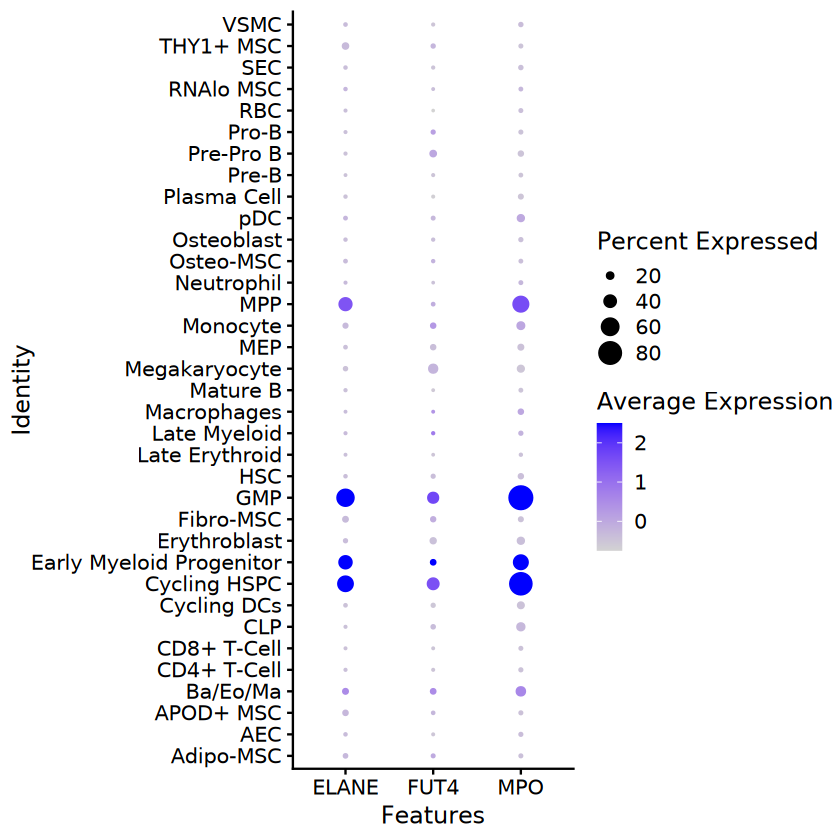

In [30]:
DotPlot(bmAtlas, features = c("ELANE", "FUT4", "MPO"))

### Pre-process metadata columns

In [4]:
head(grimes_atlas[[]])
colnames(grimes_atlas[[]])

,sample,ancestry,sex,age,capture,Level 1,Level 2,Level 3 Multimodal,Level 3 RNA,confidence,⋯,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,Level3R,Level3M,Level2,Level1
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
CATGGATGTCATTCCC-1.WF26_031423_CD271,WF26-CD271,European,Female,26 yrs,CD34+/CD271+,GMP,GMP,MultiLin-GMP-3,MEP-1,median-low,⋯,5840.885,5826,4838,3676,1,1,MEP-1,MultiLin-GMP-3,GMP,GMP
AGGGTCCAGGCAGTCA-1.WF26_031423_CD34,WF26-CD34,European,Female,26 yrs,CD34hi,GMP,GMP,MultiLin-GMP-2,MultiLin-GMP,medium-high,⋯,5244.857,4378,5781,4313,1,1,MultiLin-GMP,MultiLin-GMP-2,GMP,GMP
CATGGTATCTCTTAAC-1.WM34_120522_CD34,WM34-CD34,European,Male,34 yrs,CD34hi,Early-lymphoid,CLP,Pro-B-1,Pro-B-1,median-low,⋯,5581.167,3848,5592,3796,17,17,Pro-B-1,Pro-B-1,CLP,Early-lymphoid
GCTACCTAGCGAGTAC-1.BM27_120522_CD34,BM27-CD34,African,Male,27 yrs,CD34hi,HSPC,HSC,HSC-2,MPP-1,high,⋯,5555.269,4583,5788,4462,2,2,MPP-1,HSC-2,HSC,HSPC
AGCTACAGTATCGAGG-1.WM34_120522_CD34,WM34-CD34,European,Male,34 yrs,CD34hi,Monocytic,Myeloid intermediate,Myeloid intermediate 1,Myeloid intermediate 1,high,⋯,4310.535,3100,5168,3082,0,0,Myeloid intermediate 1,Myeloid intermediate 1,Myeloid intermediate,Monocytic
CCGATCTCAGAGGAAA-1.WM34_120522_TNC,WM34-TNC,European,Male,34 yrs,Total nucleated,Monocytic,Monocyte,Intermediate Mono-1,Intermediate Mono-1,high,⋯,5210.827,3368,5164,3339,10,10,Intermediate Mono-1,Intermediate Mono-1,Monocyte,Monocytic


[1] "sample"             "ancestry"           "sex"               
 [4] "age"                "capture"            "Level 1"           
 [7] "Level 2"            "Level 3 Multimodal" "Level 3 RNA"       
[10] "confidence"         "tfidf1"             "Donor"             
[13] "percent.mt"         "nCount_RNA"         "nFeature_RNA"      
[16] "nCount_SCT"         "nFeature_SCT"       "SCT_snn_res.0.8"   
[19] "seurat_clusters"    "Level3R"            "Level3M"           
[22] "Level2"             "Level1"

In [3]:
#bm_lognorm$Age <- bm_lognorm$age
#bm_lognorm$Sample_ID <- bm_lognorm$UPN
#bm_lognorm$orig_anno <- bm_lognorm$WC_annot_2
#bm_lognorm$Site_of_origin <- "Hip"
#bm_lognorm$data_source <- "Old sn merge"
#bm_lognorm$data_type_rna <- "snRNA"


bmAtlas$Sample_ID <- bmAtlas$orig.ident
grimes_atlas$Sample_ID <- grimes_atlas$Donor
bmAtlas$orig_anno <- bmAtlas$cluster_anno_l2
#bm_new$orig_anno <- bm_new$cluster_anno_WC
grimes_atlas$orig_anno <- grimes_atlas$Level3M
bmAtlas$orig_anno_coarse <- bmAtlas$cluster_anno_l1
#bm_new$orig_anno_coarse <- bm_new$cluster_anno_coarse_WC
grimes_atlas$orig_anno_coarse <- grimes_atlas$Level2
#bm_new$Site_of_origin <- "Hip (femoral head)"
bmAtlas$Site_of_origin <- "Hip (femoral head)"
grimes_atlas$Site_of_origin <- "Hip (iliac crest)"
bmAtlas$data_source <- "Kai Tan reference"
#bm_new$data_source <- "New sc merge"
grimes_atlas$data_source <- "Grimes reference"
bmAtlas$data_type_rna <- "scRNA"
#bm_new$data_type_rna <- "scRNA"
grimes_atlas$data_type_rna <- "scRNA"

# Merge Grimes & Kai Tan data

In [4]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

DefaultAssay(bmAtlas) <- "RNA"
bmAtlas <- DietSeurat(bmAtlas, assay = "RNA", layer = "counts")
DefaultAssay(grimes_atlas) <- "RNA"
grimes_atlas <- DietSeurat(grimes_atlas, assay = "RNA", layer = "counts")

bm_ref_merge <- merge(x = bmAtlas, y = grimes_atlas, merge.data = FALSE)
bm_ref_merge <- CellCycleScoring(bm_ref_merge, s.features = s.genes, g2m.features = g2m.genes, assay='RNA', set.ident = TRUE)
bm_ref_merge$CC.Difference <- bm_ref_merge$S.Score - bm_ref_merge$G2M.Score

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”


## Try integration

In [5]:
########## No integration ###########
bm_ref_merge <- bm_ref_merge %>% NormalizeData() %>% FindVariableFeatures() %>% ScaleData() %>%
    RunPCA(npcs = 50) %>% RunUMAP(reduction = "pca", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "pca", dims = 1:30) %>% FindClusters()

pdf("bm_RefMerge_Tan_Grimes_v1_NoIntegration_LogNorm_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_ref_merge, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "data_source", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "Site_of_origin", label = TRUE))
dev.off()

pdf("bm_RefMerge_Tan_Grimes_v1_NoIntegration_LogNorm_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_ref_merge, group.by = "orig_anno", label = TRUE, repel = TRUE))
print(DimPlot(bm_ref_merge, group.by = "orig_anno_coarse", label = TRUE, repel = TRUE))
dev.off()
saveRDS(bm_ref_merge, "RDS/bm_RefMerge_Tan_Grimes_v1_NoIntegration.rds")

########## Integration ##############
DefaultAssay(bm_ref_merge) <- "RNA"
bm_ref_merge <- DietSeurat(bm_ref_merge, assay = "RNA", layer = "counts")
bm_ref_merge[["RNA"]] <- split(bm_ref_merge[["RNA"]], f = bm_ref_merge$data_source)
#bm_merge <- bm_merge %>% SCTransform(vars.to.regress = c("percent.mt", "nCount_RNA", "nFeature_RNA", "CC.Difference")) %>%
#    RunPCA(npcs = 50) %>% RunUMAP(reduction = "pca", dims = 1:30, seed.use = 42) %>% FindNeighbors(reduction = "pca", dims = 1:30) %>%
#    FindClusters()

bm_ref_merge <- bm_ref_merge %>% NormalizeData() %>% FindVariableFeatures() %>% ScaleData() %>%
    RunPCA(npcs = 50) %>% RunUMAP(reduction = "pca", dims = 1:30, seed.use = 42) %>% FindNeighbors(reduction = "pca", dims = 1:30) %>%
    FindClusters()

# Plot pre-integration UMAPs
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_PreIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_ref_merge, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "data_source", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_ref_merge, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_PreIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_ref_merge, group.by = "orig_anno", label = TRUE, repel = TRUE))
print(DimPlot(bm_ref_merge, group.by = "orig_anno_coarse", label = TRUE, repel = TRUE))
dev.off()
saveRDS(bm_ref_merge, "RDS/bm_RefMerge_Tan_Grimes_v1_PreIntegration.rds")

# RPCA integration
bm_merge_RPCAInt <- IntegrateLayers(bm_ref_merge, method = RPCAIntegration, 
                                    orig.reduction = "pca", new.reduction = "integrated.rpca")
bm_merge_RPCAInt <- RunUMAP(bm_merge_RPCAInt, reduction = "integrated.rpca", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "integrated.rpca", dims = 1:30) %>% FindClusters()
# Plot RPCA integration UMAPs
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_RPCAIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge_RPCAInt, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_RPCAIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge_RPCAInt, group.by = "orig_anno", label = TRUE, repel = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "orig_anno_coarse", label = TRUE, repel = TRUE))
dev.off()

# CCA integration
bm_merge_CCAInt <- IntegrateLayers(bm_ref_merge, method = CCAIntegration, 
                                    orig.reduction = "pca", new.reduction = "integrated.cca")
bm_merge_CCAInt <- RunUMAP(bm_merge_CCAInt, reduction = "integrated.cca", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "integrated.cca", dims = 1:30) %>% FindClusters()
# Plot RPCA integration UMAPs
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_CCAIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge_CCAInt, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_CCAIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge_CCAInt, group.by = "orig_anno", label = TRUE, repel = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "orig_anno_coarse", label = TRUE, repel = TRUE))
dev.off()

# Harmony integration
bm_merge_HarInt <- IntegrateLayers(bm_ref_merge, method = HarmonyIntegration, 
                                    orig.reduction = "pca", new.reduction = "integrated.harmony")
bm_merge_HarInt <- RunUMAP(bm_merge_HarInt, reduction = "integrated.harmony", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "integrated.harmony", dims = 1:30) %>% FindClusters()
# Plot Harmony integration UMAPs
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_HarmonyIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge_HarInt, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_RefMerge_Tan_Grimes_v1_LogNorm_HarmonyIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge_HarInt, group.by = "orig_anno", label = TRUE, repel = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "orig_anno_coarse", label = TRUE, repel = TRUE))
dev.off()

saveRDS(bm_merge_RPCAInt, "RDS/bm_RefMerge_Tan_Grimes_v1_RPCAIntegration.rds")
saveRDS(bm_merge_CCAInt, "RDS/bm_RefMerge_Tan_Grimes_v1_CCAIntegration.rds")
saveRDS(bm_merge_HarInt, "RDS/bm_RefMerge_Tan_Grimes_v1_HarmonyIntegration.rds")

Centering and scaling data matrix

PC_ 1 
Positive:  CALD1, KAZN, CDH11, COL1A2, NNMT, DCN, COL6A2, FBN1, CHL1, RBMS3 
	   CXCL12, NAV2, FSTL1, COL6A1, COL3A1, MGP, TMEM108, CYP1B1, APOE, LAMA4 
	   LUM, BMP5, FBXL7, LHFPL6, PCOLCE, LEPR, EPAS1, ANTXR1, IGFBP5, ENAH 
Negative:  STMN1, HIST1H1D, HLA-DPB1, HMGB2, KCNQ5, HLA-DRB1, PCLAF, MCTP2, CD44, HLA-DQB1 
	   TYMS, MED12L, AREG, CD69, PLEK, IGLL1, AFF3, ZNF804A, SEC11C, TBXAS1 
	   ATP8B4, TFRC, RNF220, MCTP1, PIK3R5, MZB1, RNF130, EIF2AK3, PDE3B, FOXK2 
PC_ 2 
Positive:  CHL1, NCAM2, EYA1, TMEM108, CHRDL1, PAPPA, SLC1A3, BMPER, CP, BMP5 
	   TMEM132C, ABCA8, ROR2, BICC1, TMEM176B, CFD, APOE, HNMT, CNTNAP2, TF 
	   ESM1, VCAN, NLGN1, TNFAIP6, ADCY2, PCDH18, NAV2, PID1, TENM4, TMEM176A 
Negative:  ADGRL4, LDB2, EMCN, VWF, PTPRB, TM4SF1, FLT1, RAMP3, ARHGAP29, RAMP2 
	   A2M, PALMD, TEK, AQP1, FABP4, RNASE1, DNASE1L3, TM4SF18, PLVAP, PLAT 
	   PODXL, CXorf36, GNG11, ANO2, CAV1, IFI27, CLEC14A, SOX18, BTNL9, PCAT19 
PC_ 3 
Positive:  CP

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 154202
Number of edges: 5678784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9481
Number of communities: 44
Elapsed time: 84 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Warning message:
“Input is a v3 assay and `split()` only works for v5 assays; converting
• to a v5 assay”
Warning message:
“Assay RNA changing from Assay to Assay5”
Normalizing layer: counts.Kai_Tan_reference

Normalizing layer: counts.Grimes_reference

Finding variable features for layer counts.Kai_Tan_reference

Finding variable features for layer counts.Grimes_reference

Centering and scaling data matrix

PC_ 1 
Positive:  CALD1, KAZN, COL1A2, CDH11, DCN, NNMT, COL6A2, COL6A1, LUM, CXCL12 
	   MGP, APOE, CHL1, CYP1B1, RBMS3, COL3A1, FSTL1, PCOLCE, SELENOP, NAV2 
	   TMEM108, IGFBP5, LAMA4, EPAS1, BMP5, FBXL7, ENAH, LEPR, ANTXR1, GHR 
Negative:  SNHG29, PRKCB, LYN, MSI2, HLA-DRA, CD74, HLA-DPA1, GAB2, CDK6, STMN1 
	   PPP1R16B, HIST1H1D, HLA-DPB1, MIR181A1HG, GALNT7, RNF125, PRSS57, HMGB2, HLA-DRB1, GYPC 
	   LINC01619, GAPDH, KCNQ5, CYBA, PCLAF, CXCR4, MED12L, TYMS, HLA-DQB1, IGLL1 
PC_ 2 
Positive:  SSBP2, MSI2, CDK6, IGLL1, AUTS2, FHIT, GYPC, DNTT, VPREB1, TCF4 
	   STMN1, CASC15,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 154202
Number of edges: 5506797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9520
Number of communities: 48
Elapsed time: 71 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 7460 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

12:44:55 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:44:55 Read 154202 rows and found 30 numeric columns

12:44:55 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:44:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 154202
Number of edges: 5466912

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9448
Number of communities: 39
Elapsed time: 80 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 42481 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

12:59:07 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:59:07 Read 154202 rows and found 30 numeric columns

12:59:07 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:59:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:59:29 Writing NN index file to temp file /disk

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 154202
Number of edges: 5633754

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9446
Number of communities: 39
Elapsed time: 80 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Warning message:
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Warning message:
“Warning: The parameter tau is deprecated. It will be ignored for this function call and please remove parameter tau in future function calls. Advanced users can set value of parameter tau by using parameter .options and function harmony_options().
This warning is displayed once per session.”
Warning message:
“Warning: The parameter block.size is deprecated. It will be ignored for this function call and please remove parameter block.size in future function calls. Advanced users can set value of parameter block.size by using parameter .options and function harmony_options().
This warning is displayed once per sessi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 154202
Number of edges: 5428628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9448
Number of communities: 42
Elapsed time: 75 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [32]:
# CCA integration
bm_merge_CCAInt <- IntegrateLayers(bm_merge, method = CCAIntegration, 
                                    orig.reduction = "pca", new.reduction = "integrated.cca", normalization.method = "SCT")
bm_merge_CCAInt <- RunUMAP(bm_merge_CCAInt, reduction = "integrated.cca", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "integrated.cca", dims = 1:30) %>% FindClusters()
saveRDS(bm_merge_CCAInt, "RDS/bm_merge_inhouse_TanRef_v1_CCAIntegration.rds")
# Plot Harmony integration UMAPs
pdf("bm_merge_inhouse_TanRef_v1_CCAIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge_CCAInt, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_merge_inhouse_TanRef_v1_CCAIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge_CCAInt, group.by = "orig_anno", label = TRUE))
dev.off()

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 19809 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 29608 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 15629 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 1 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

14:12:24 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:12:24 Read 140834 rows and found 30 numeric columns

14:12:24 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGene

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 140834
Number of edges: 4400240

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9502
Number of communities: 54
Elapsed time: 31 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

# Merge in-house data with reference

In [2]:
bm_new <- readRDS("/diskmnt/Projects/SenNet_analysis/Main.analysis/bm/scRNA/merged/06182024_WC/merge_06182024_WC.rds")
bm_ref_merge <- readRDS("RDS/bm_RefMerge_Tan_Grimes_v1_NoIntegration.rds")

In [3]:
head(bm_new[[]])

,orig.ident,nCount_RNA,nFeature_RNA,rho,percent.mt,percent.rb,doublet_score,predicted_doublet,S.Score,G2M.Score,⋯,SCT_snn_res.0.5,seurat_clusters,old.ident,CC.Difference,Sample_ID,Site_of_origin,SCT_snn_res.0.6,SCT_snn_res.0.8,cluster_anno_WC,cluster_anno_coarse_WC
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,⋯,<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACGCTAGGTAACTA-1_1,SN112R1-Ja1P2G1Zt1_1Bc1_1,1790,659,0.01,5.3072626,1.6201117,0.1370558,FALSE,-0.052409639,0.05369411,⋯,1,13,1,-0.10610375,SN112R1,Hip,14,13,RBC/Late erythroid-1,Erythroid
AAACGCTGTCTGTGAT-1_1,SN112R1-Ja1P2G1Zt1_1Bc1_1,3203,533,0.01,1.6546987,0.4058695,0.1370558,FALSE,-0.044578313,-0.03269888,⋯,1,13,1,-0.01187944,SN112R1,Hip,14,13,RBC/Late erythroid-1,Erythroid
AAAGTCCCATCGGAGA-1_1,SN112R1-Ja1P2G1Zt1_1Bc1_1,5569,830,0.01,0.6643922,0.4848267,0.3461538,FALSE,-0.104819277,-0.08052709,⋯,2,13,2,-0.02429219,SN112R1,Hip,14,13,RBC/Late erythroid-1,Erythroid
AAAGTGAGTGGACAGT-1_1,SN112R1-Ja1P2G1Zt1_1Bc1_1,1199,770,0.01,2.2518766,0.6672227,0.2093023,FALSE,-0.001491681,-0.02762135,⋯,0,4,0,0.02612967,SN112R1,Hip,6,4,Intermediate myeloid-1,Myeloid
AAAGTGAGTTCAAACC-1_1,SN112R1-Ja1P2G1Zt1_1Bc1_1,4438,813,0.01,0.7886435,0.2253267,0.1570248,FALSE,-0.086144578,-0.05592784,⋯,2,13,2,-0.03021673,SN112R1,Hip,14,13,RBC/Late erythroid-1,Erythroid
AAATGGACATTGACAC-1_1,SN112R1-Ja1P2G1Zt1_1Bc1_1,1138,537,0.01,8.8752197,0.4393673,0.1370558,FALSE,0.038296041,0.42444720,⋯,1,18,1,-0.38615116,SN112R1,Hip,16,18,RBC/Late erythroid-2,Erythroid


In [3]:
bm_new$orig_anno <- bm_new$cluster_anno_WC
bm_new$orig_anno_coarse <- bm_new$cluster_anno_coarse_WC
bm_new$data_source <- "In-house"
bm_new$data_type_rna <- "scRNA"

In [4]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

DefaultAssay(bm_ref_merge) <- "RNA"
bm_ref_merge <- DietSeurat(bm_ref_merge, assay = "RNA", layer = "counts")
DefaultAssay(bm_new) <- "RNA"
bm_new <- DietSeurat(bm_new, assay = "RNA", layer = "counts")

bm_merge <- merge(x = bm_ref_merge, y = bm_new, merge.data = FALSE)
bm_merge <- CellCycleScoring(bm_merge, s.features = s.genes, g2m.features = g2m.genes, assay='RNA', set.ident = TRUE)
bm_merge$CC.Difference <- bm_merge$S.Score - bm_merge$G2M.Score

#bm_merge <- bm_merge %>% SCTransform(vars.to.regress = c("percent.mt", "nCount_RNA", "nFeature_RNA", "CC.Difference")) %>%
#    RunPCA(npcs = 50) %>% RunUMAP(reduction = "pca", dims = 1:30, seed.use = 42) %>% FindNeighbors(reduction = "pca", dims = 1:30) %>%
#    FindClusters()


bm_merge <- bm_merge %>% NormalizeData() %>% FindVariableFeatures() %>% ScaleData() %>%
    RunPCA(npcs = 50) %>% RunUMAP(reduction = "pca", dims = 1:30, seed.use = 42) %>% FindNeighbors(reduction = "pca", dims = 1:30) %>%
    FindClusters()


pdf("scRNA/bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_NoIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge, group.by = "Site_of_origin", label = TRUE))
dev.off()

pdf("scRNA/bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_NoIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge, group.by = "orig_anno", label = TRUE))
dev.off()
#saveRDS(bm_merge, "RDS/bm_merge_inhouse_TanRef_v1_scRNA_Only_LogNorm_NoIntegration.rds")

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”
Centering and scaling data matrix

PC_ 1 
Positive:  LYZ, ATP8B4, TBXAS1, CD69, S100A12, LTB, HIST1H1D, MCTP1, NKG7, MMP9 
	   CRISP3, LTF, UBASH3B, RETN, PCLAF, KCNQ5, HLA-DQB1, MED12L, LCN2, PRSS57 
	   AREG, AQP9, HLA-DPB1, STAT4, CAMP, TYMS, IL7R, IL1R2, IGLL1, MMP8 
Negative:  CALD1, KAZN, COL1A2, CDH11, DCN, NNMT, COL6A2, CHL1, CXCL12, FSTL1 
	   COL6A1, MGP, COL3A1, LHFPL6, LUM, APOE, RBMS3, FBXL7, LAMA4, TMEM108 
	   BMP5, PCOLCE, EPAS1, IGFBP5, GHR, ENAH, SELENOP, CFH, ANTXR1, FBN1 
PC_ 2 
Positive:  ADGRL4, EMCN, LDB2, VWF, TM4SF1, PTPRB, RAMP2, PALMD, FABP4, ARHGAP29 
	   CAV1, RAMP3, GNG11, AQP1, PLVAP, TEK, CLEC14A, IFI27, DNASE1L3, TM4SF18 
	   FLT1, PODXL, ANO2, SOX18, PLAT, BTNL9, RNASE1, PCAT19, CXorf36, KDR 
Negative:  CHL1, EYA1, NCAM2,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 264624
Number of edges: 9528058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9490
Number of communities: 45
Elapsed time: 132 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [6]:
saveRDS(bm_merge, "RDS/bm_merge_inhouse_TanRef_v1_scRNA_Only_LogNorm_NoIntegration.rds")

In [6]:
#bm_merge <- readRDS("RDS/bm_merge_inhouse_TanRef_v1_scRNA_Only_NoIntegration.rds")

In [5]:
DefaultAssay(bm_merge) <- "RNA"
bm_merge <- DietSeurat(bm_merge, assay = "RNA", layer = "counts")
bm_merge[["RNA"]] <- split(bm_merge[["RNA"]], f = bm_merge$data_source)
#bm_merge <- bm_merge %>% SCTransform(vars.to.regress = c("percent.mt", "nCount_RNA", "nFeature_RNA", "CC.Difference")) %>%
#    RunPCA(npcs = 50) %>% RunUMAP(reduction = "pca", dims = 1:30, seed.use = 42) %>% FindNeighbors(reduction = "pca", dims = 1:30) %>%
#    FindClusters()

bm_merge <- bm_merge %>% NormalizeData() %>% FindVariableFeatures() %>% ScaleData() %>%
    RunPCA(npcs = 50) %>% RunUMAP(reduction = "pca", dims = 1:30, seed.use = 42) %>% FindNeighbors(reduction = "pca", dims = 1:30) %>%
    FindClusters()

# Plot pre-integration UMAPs
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_PreIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_PreIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge, group.by = "orig_anno", label = TRUE))
dev.off()


Warning message:
“Input is a v3 assay and `split()` only works for v5 assays; converting
• to a v5 assay”
Warning message:
“Assay RNA changing from Assay to Assay5”
Normalizing layer: counts.Kai_Tan_reference

Normalizing layer: counts.Grimes_reference

Normalizing layer: counts.In-house

Finding variable features for layer counts.Kai_Tan_reference

Finding variable features for layer counts.Grimes_reference

Finding variable features for layer counts.In-house

Centering and scaling data matrix

PC_ 1 
Positive:  LYN, SNHG29, SAMSN1, CXCR4, RAB11FIP1, ALOX5AP, PAG1, ARHGAP26, S100A9, S100A8 
	   PIK3R5, PLEK, TYROBP, PDE3B, LYZ, SYTL3, S100A4, CYBB, SRGN, ATP8B4 
	   AIF1, SIPA1L1, HMGB2, S100A12, FCER1G, AOAH, FCAR, FCN1, CD69, RBM47 
Negative:  CALD1, KAZN, COL1A2, CDH11, DCN, NNMT, COL6A2, CXCL12, COL6A1, FSTL1 
	   MGP, CHL1, APOE, COL3A1, LHFPL6, LUM, RBMS3, LAMA4, BMP5, FBXL7 
	   PCOLCE, TMEM108, IGFBP5, EPAS1, SELENOP, GHR, ENAH, ANTXR1, ANGPTL4, FBN1 
PC_ 2 
Positive:  S100A9,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 264624
Number of edges: 9518051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9509
Number of communities: 45
Elapsed time: 134 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

ERROR: Error in as(object = object.list[[i]][[assay[i]]], Class = "SCTAssay"): no method or default for coercing “Assay5” to “SCTAssay”


In [6]:
# RPCA integration
bm_merge_RPCAInt <- IntegrateLayers(bm_merge, method = RPCAIntegration, 
                                    orig.reduction = "pca", new.reduction = "integrated.rpca")
bm_merge_RPCAInt <- RunUMAP(bm_merge_RPCAInt, reduction = "integrated.rpca", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "integrated.rpca", dims = 1:30) %>% FindClusters()
# Plot RPCA integration UMAPs
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_RPCAIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge_RPCAInt, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge_RPCAInt, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_RPCAIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge_RPCAInt, group.by = "orig_anno", label = TRUE))
dev.off()

# CCA integration
bm_merge_CCAInt <- IntegrateLayers(bm_merge, method = CCAIntegration, 
                                    orig.reduction = "pca", new.reduction = "integrated.cca")
bm_merge_CCAInt <- RunUMAP(bm_merge_CCAInt, reduction = "integrated.cca", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "integrated.cca", dims = 1:30) %>% FindClusters()
# Plot RPCA integration UMAPs
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_CCAIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge_CCAInt, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge_CCAInt, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_CCAIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge_CCAInt, group.by = "orig_anno", label = TRUE))
dev.off()

# Harmony integration
bm_merge_HarInt <- IntegrateLayers(bm_merge, method = HarmonyIntegration, 
                                    orig.reduction = "pca", new.reduction = "integrated.harmony")
bm_merge_HarInt <- RunUMAP(bm_merge_HarInt, reduction = "integrated.harmony", dims = 1:30, seed.use = 42) %>% 
    FindNeighbors(reduction = "integrated.harmony", dims = 1:30) %>% FindClusters()
# Plot Harmony integration UMAPs
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_HarmonyIntegration_PC30_UMAPs.pdf", width = 8, height = 6)
print(DimPlot(bm_merge_HarInt, group.by = "seurat_clusters", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "Sample_ID", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "data_source", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "data_type_rna", label = TRUE))
print(DimPlot(bm_merge_HarInt, group.by = "Site_of_origin", label = TRUE))
dev.off()
pdf("bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_HarmonyIntegration_PC30_UMAP_origIdent.pdf", width = 20, height = 8)
print(DimPlot(bm_merge_HarInt, group.by = "orig_anno", label = TRUE))
dev.off()

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 7540 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 10652 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 6811 anchors

Merging dataset 1 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 3 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

11:57:01 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:57:01 Read 264624 rows and found 30 numeric columns

11:57:01 Using Annoy for neighbor search

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 264624
Number of edges: 9581975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9470
Number of communities: 39
Elapsed time: 119 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 42258 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 47463 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 46192 anchors

Merging dataset 2 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 3 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

12:25:50 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:25:50 Read 264624 rows and found 30 numeric columns

12:25:50 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGene

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 264624
Number of edges: 10056222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9440
Number of communities: 42
Elapsed time: 137 seconds


3 singletons identified. 39 final clusters.

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Warning message:
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Warning message:
“Warning: The parameter tau is deprecated. It will be ignored for this function call and please remove parameter tau in future function calls. Advanced users can set value of parameter tau by using parameter .options and function harmony_options().
This warning is displayed once per session.”
Warning message:
“Warning: The parameter block.size is deprecated. It will be ignored for this function call and please remove parameter block.size in future function calls. Advanced users can set value of parameter block.size by using parameter .options and function harmony_options().
This warning is displayed once per sessi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 264624
Number of edges: 9452007

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9470
Number of communities: 39
Elapsed time: 127 seconds


1 singletons identified. 38 final clusters.

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [7]:
saveRDS(bm_merge, "RDS/bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_preIntegration_normalized.rds")
saveRDS(bm_merge_RPCAInt, "RDS/bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_RPCAIntegration.rds")
saveRDS(bm_merge_CCAInt, "RDS/bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_CCAIntegration.rds")
saveRDS(bm_merge_HarInt, "RDS/bm_merge_inhouse0618_TanGrimesRef_v1_LogNorm_HarmonyIntegration.rds")

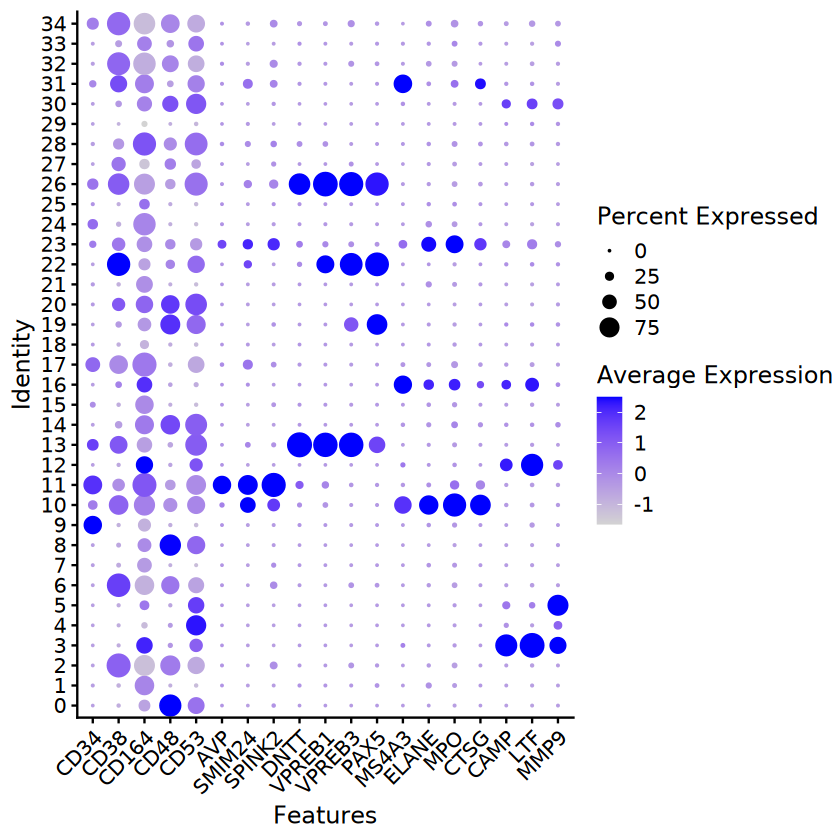

In [11]:
DotPlot(bm_merge_HarInt, features = c("CD34", "CD38", "CD164", "CD48", "CD53", "AVP", "SMIM24", "SPINK2", "DNTT", "VPREB1", "VPREB3", "PAX5",
                              "MS4A3", "ELANE", "MPO", "CTSG", "CAMP", "LTF", "MMP9")) + RotatedAxis()

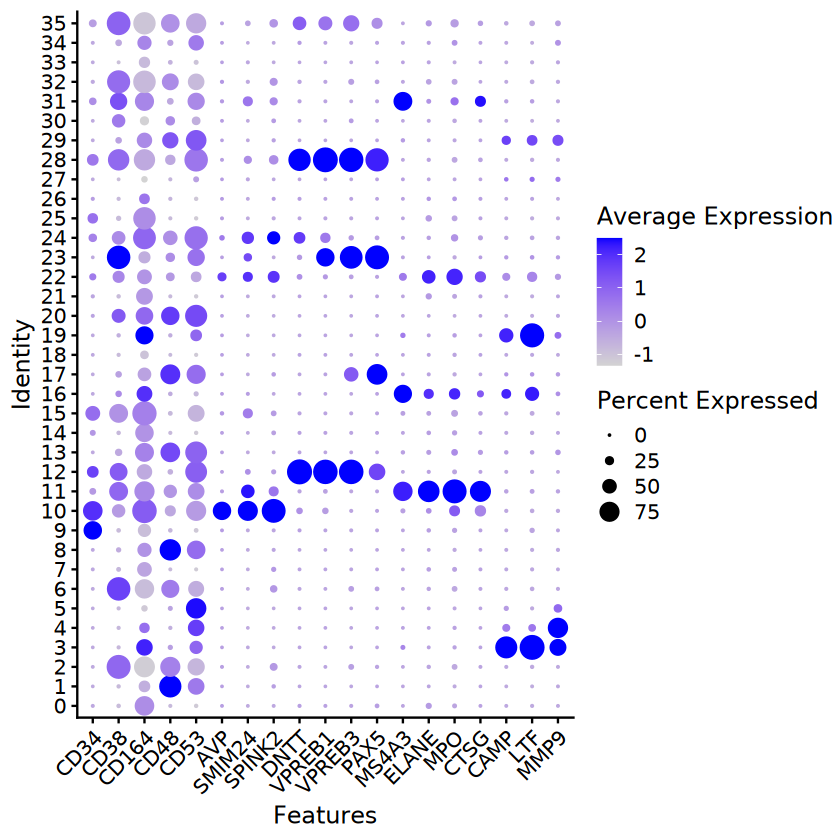

In [13]:
DotPlot(bm_merge_RPCAInt, features = c("CD34", "CD38", "CD164", "CD48", "CD53", "AVP", "SMIM24", "SPINK2", "DNTT", "VPREB1", "VPREB3", "PAX5",
                              "MS4A3", "ELANE", "MPO", "CTSG", "CAMP", "LTF", "MMP9")) + RotatedAxis()

In [8]:
bm_clinical <- read.csv("/diskmnt/Projects/SenNet_analysis/Main.analysis/bm/bm_clinical_table_06192024.csv")

png 
  2